In [160]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

In [161]:
def central_field_approximation(r : float, Z : float) -> float:
	return Z**3 * 4 * r**2 * np.exp(-2 * Z * r)

In [162]:
data = np.genfromtxt("../data/data_n5000_neq0_alpha_0.100.csv", delimiter=",")

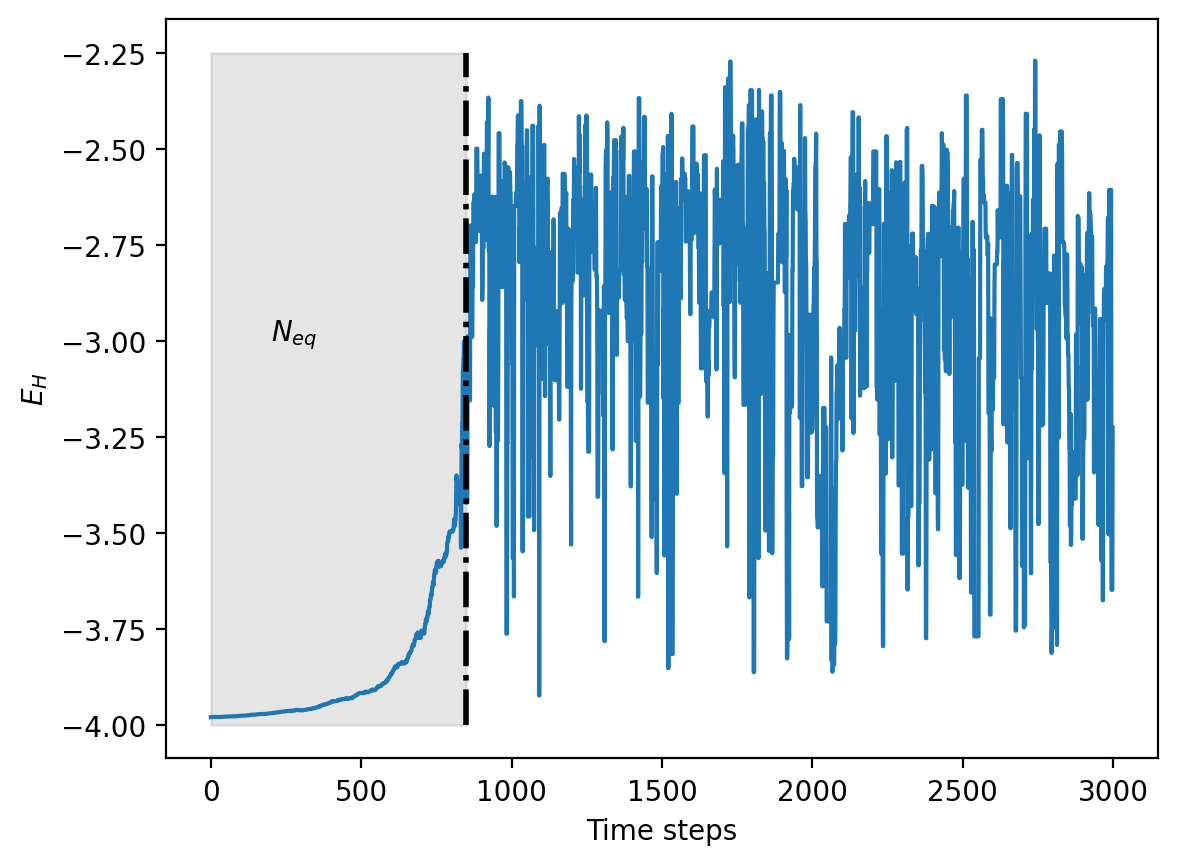

In [163]:
cum_energy = np.cumsum(data[:,-1])
plt.text(200,-3,'$N_{eq}$')
plt.fill_betweenx([-4, -2.25], 0, 850, color='gray', alpha=0.2, label="Shaded Region")
plt.plot(data[:3000,-1], label='Energy levels.')
plt.plot([850,850], [-4,-2.25],'-.', color='black', linewidth=2)
plt.xlabel('Time steps')
plt.ylabel('$E_H$')
plt.show()

In [164]:
autocorr_data = np.genfromtxt("../data/task2b.csv", delimiter=",")
autocorr = autocorr_data[:,0]
block_average = autocorr_data[:,1]
block_size = autocorr_data[:,-1]

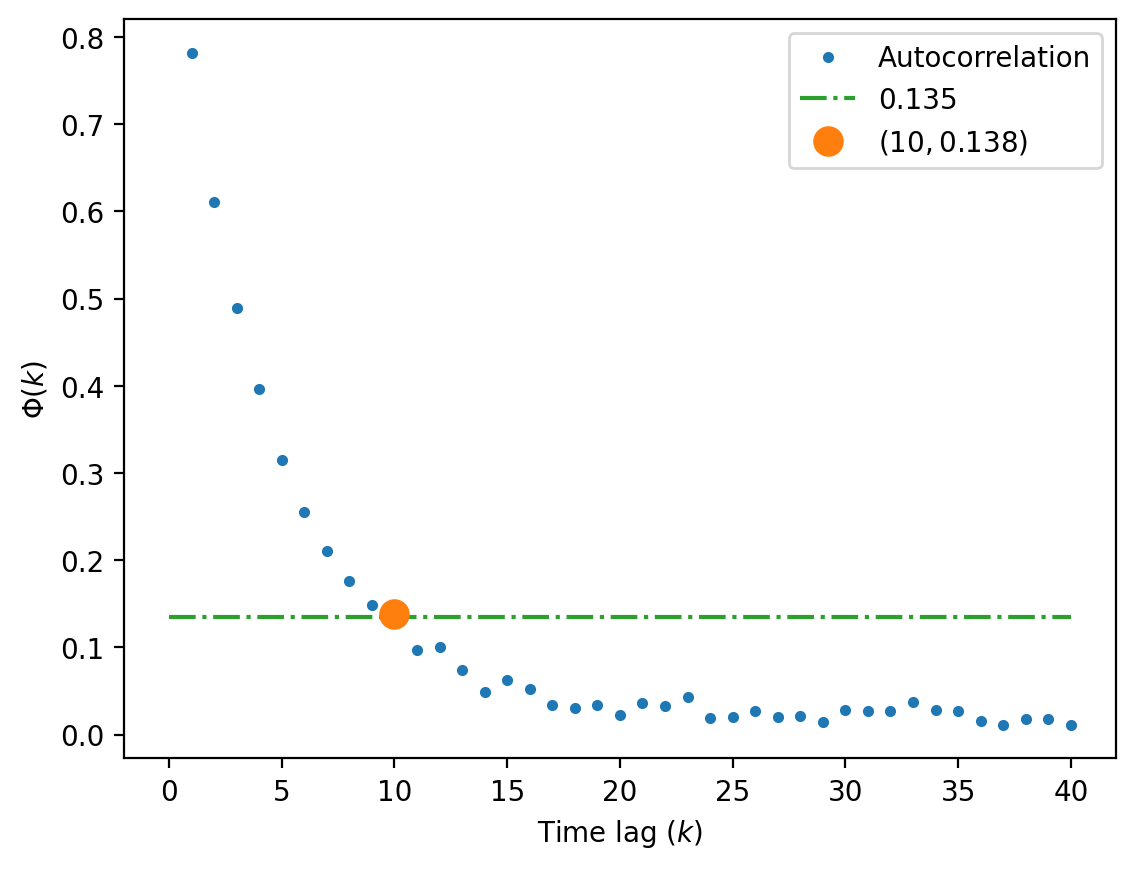

In [165]:
plt.plot(block_size[:40], autocorr[:40], '.', label='Autocorrelation')
plt.plot([0,40],[0.135,0.135], '-.',label='0.135', color='#2ca02c')
plt.plot([10],[autocorr[9]], 'o',color= '#ff7f0e', label=f'$({10},{np.round(autocorr[9],3)})$', markersize=10)
plt.xlabel(r'Time lag $(k)$')
plt.ylabel(r'$\Phi(k)$')
plt.legend()
plt.show()

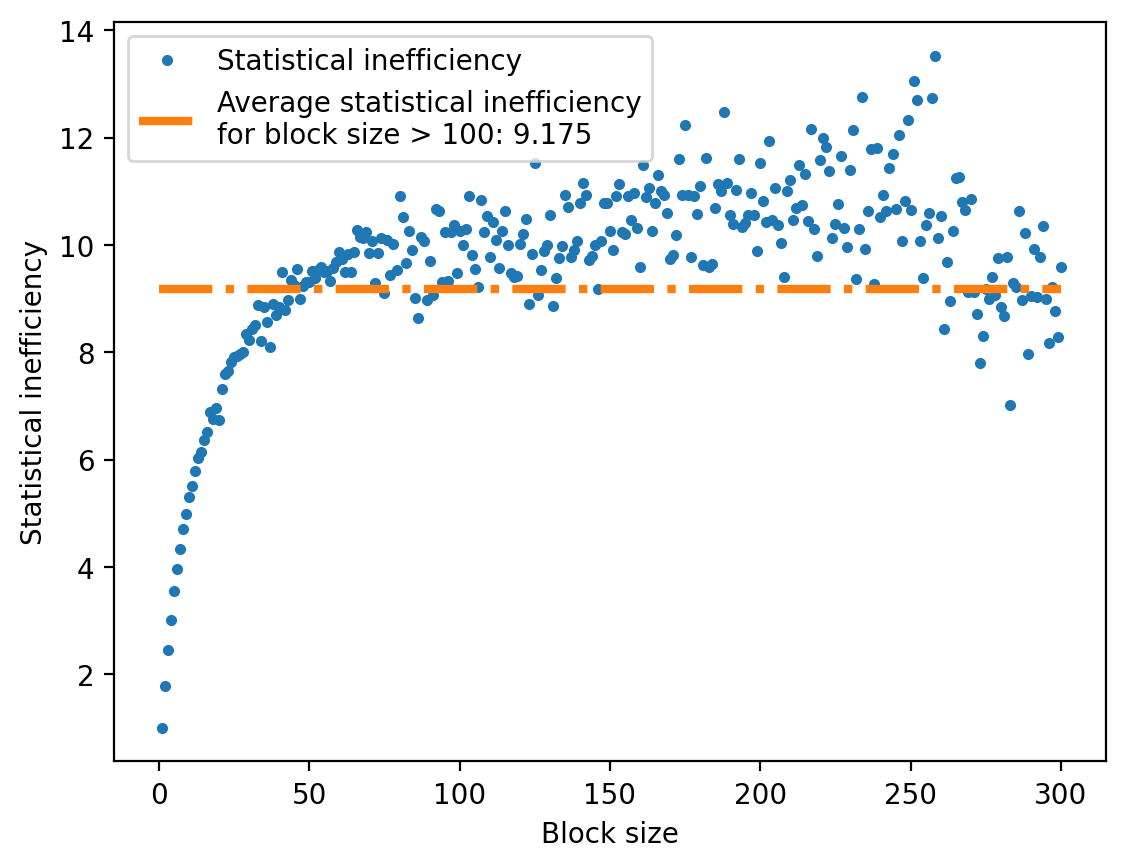

In [166]:
plot_lim = 300
average_above = 100
convergence = np.mean(block_average[average_above:])
plt.plot(block_size[:plot_lim], block_average[:plot_lim], '.', label='Statistical inefficiency')
plt.plot([0,plot_lim],[convergence, convergence],'-.',linewidth=3, 
         label=f'Average statistical inefficiency\nfor block size > {average_above}: {np.round(convergence,3)}')
plt.xlabel('Block size')
plt.ylabel('Statistical inefficiency')
plt.legend()
plt.show()